<a href="https://colab.research.google.com/github/Himasri17/IPL-Data-Analysis/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loding Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
mat=pd.read_csv("/content/matches.csv")

In [58]:
dev=pd.read_csv("/content/deliveries.csv.zip")

Analyze data set

In [59]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [60]:
mat.shape

(577, 18)

In [61]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [62]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [63]:
# city with most matches won
mat.groupby(["city"]).agg({"winner":["count"]}).max()

,,0
winner,count,77


In [64]:
mat.groupby(["city"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
city,
Mumbai,77


In [65]:
# team that won most matches
mat["winner"].value_counts().head(1)

,count
winner,
Mumbai Indians,80


In [66]:
# player who won most of man of the match awards
mat["player_of_match"].value_counts().head(1)

,count
player_of_match,
CH Gayle,17


In [67]:
# most frequent umpire 1
mat["umpire1"].value_counts().head(1)

,count
umpire1,
HDPK Dharmasena,73


In [68]:
# most frequent umpire 2

mat["umpire2"].value_counts().head(1)

,count
umpire2,
SJA Taufel,54


In [69]:
mat.describe().T

,count,mean,std,min,25%,50%,75%,max
id,577.0,289.000000,166.709828,1.0,145.0,289.0,433.0,577.0
season,577.0,2012.029463,2.486247,2008.0,2010.0,2012.0,2014.0,2016.0
dl_applied,577.0,0.025997,0.159263,0.0,0.0,0.0,0.0,1.0
win_by_runs,577.0,13.715771,23.619282,0.0,0.0,0.0,20.0,144.0
win_by_wickets,577.0,3.363951,3.416049,0.0,0.0,3.0,6.0,10.0
umpire3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [71]:
dev.shape

(136598, 21)

In [72]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

Visualizing the Data

<Axes: xlabel='winner'>

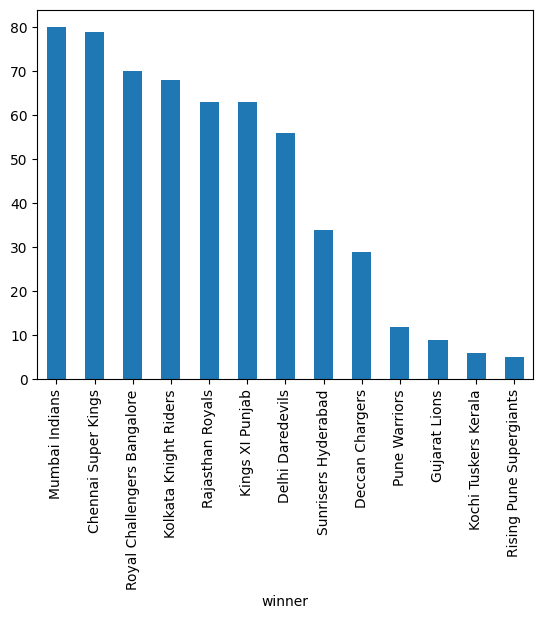

In [73]:
mat["winner"].value_counts().head(15).plot(kind="bar")

In [74]:
mat.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions'],
      dtype=object)

<Axes: xlabel='player_of_match'>

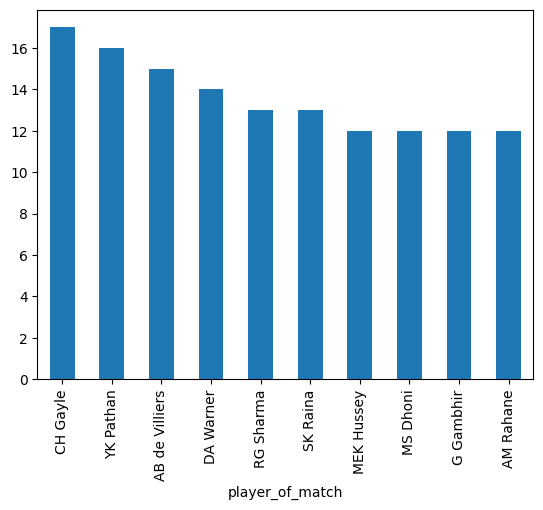

In [75]:
mat["player_of_match"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='toss_winner'>

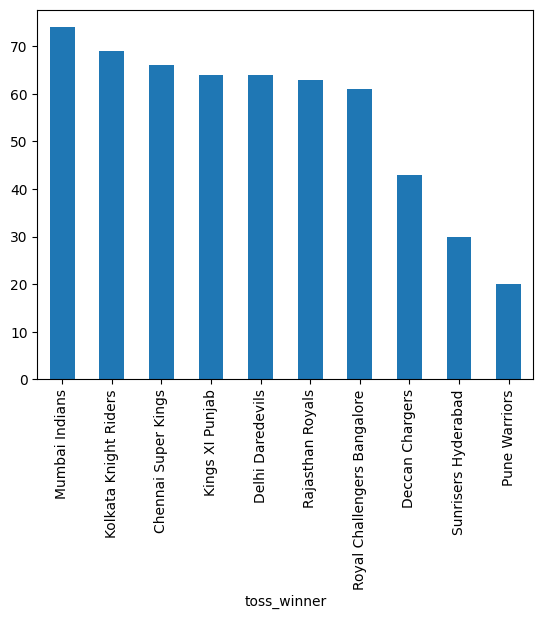

In [76]:
mat["toss_winner"].value_counts().head(10).plot(kind="bar")

In [77]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).max()

,,0
winner,count,74


In [78]:
mat.groupby(["toss_winner"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)


,winner
,count
toss_winner,
Mumbai Indians,74


In [79]:
mat=mat.rename(columns={"id":"match_id"})
mat

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [80]:
dev.head(250)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,1,Chennai Super Kings,Kings XI Punjab,4,1,MEK Hussey,ML Hayden,S Sreesanth,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
246,2,1,Chennai Super Kings,Kings XI Punjab,4,2,MEK Hussey,ML Hayden,S Sreesanth,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
247,2,1,Chennai Super Kings,Kings XI Punjab,4,3,MEK Hussey,ML Hayden,S Sreesanth,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
248,2,1,Chennai Super Kings,Kings XI Punjab,4,4,ML Hayden,MEK Hussey,S Sreesanth,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [81]:
df=pd.merge(mat,dev,on="match_id",how="left")
df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [82]:
df.isnull().sum()

,0
match_id,0
season,0
city,1700
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [83]:
df.shape

(136598, 38)

In [84]:
df.dropna(how="all",axis=1).head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          136598 non-null  int64  
 1   season            136598 non-null  int64  
 2   city              134898 non-null  object 
 3   date              136598 non-null  object 
 4   team1             136598 non-null  object 
 5   team2             136598 non-null  object 
 6   toss_winner       136598 non-null  object 
 7   toss_decision     136598 non-null  object 
 8   result            136598 non-null  object 
 9   dl_applied        136598 non-null  int64  
 10  winner            136277 non-null  object 
 11  win_by_runs       136598 non-null  int64  
 12  win_by_wickets    136598 non-null  int64  
 13  player_of_match   136277 non-null  object 
 14  venue             136598 non-null  object 
 15  umpire1           136598 non-null  object 
 16  umpire2           13

In [86]:
mat.groupby(["season"]).agg({"match_id":"count"}).rename(columns={'match_id':'no. of matches'})


,no. of matches
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


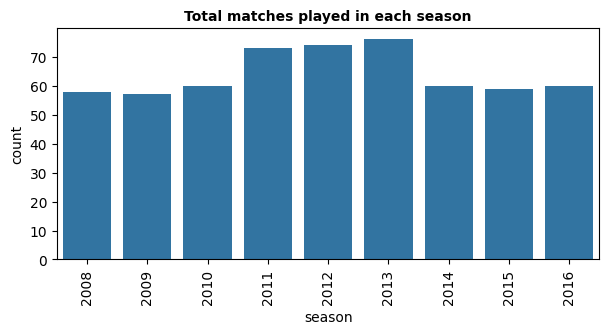

In [87]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="season",data=mat)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

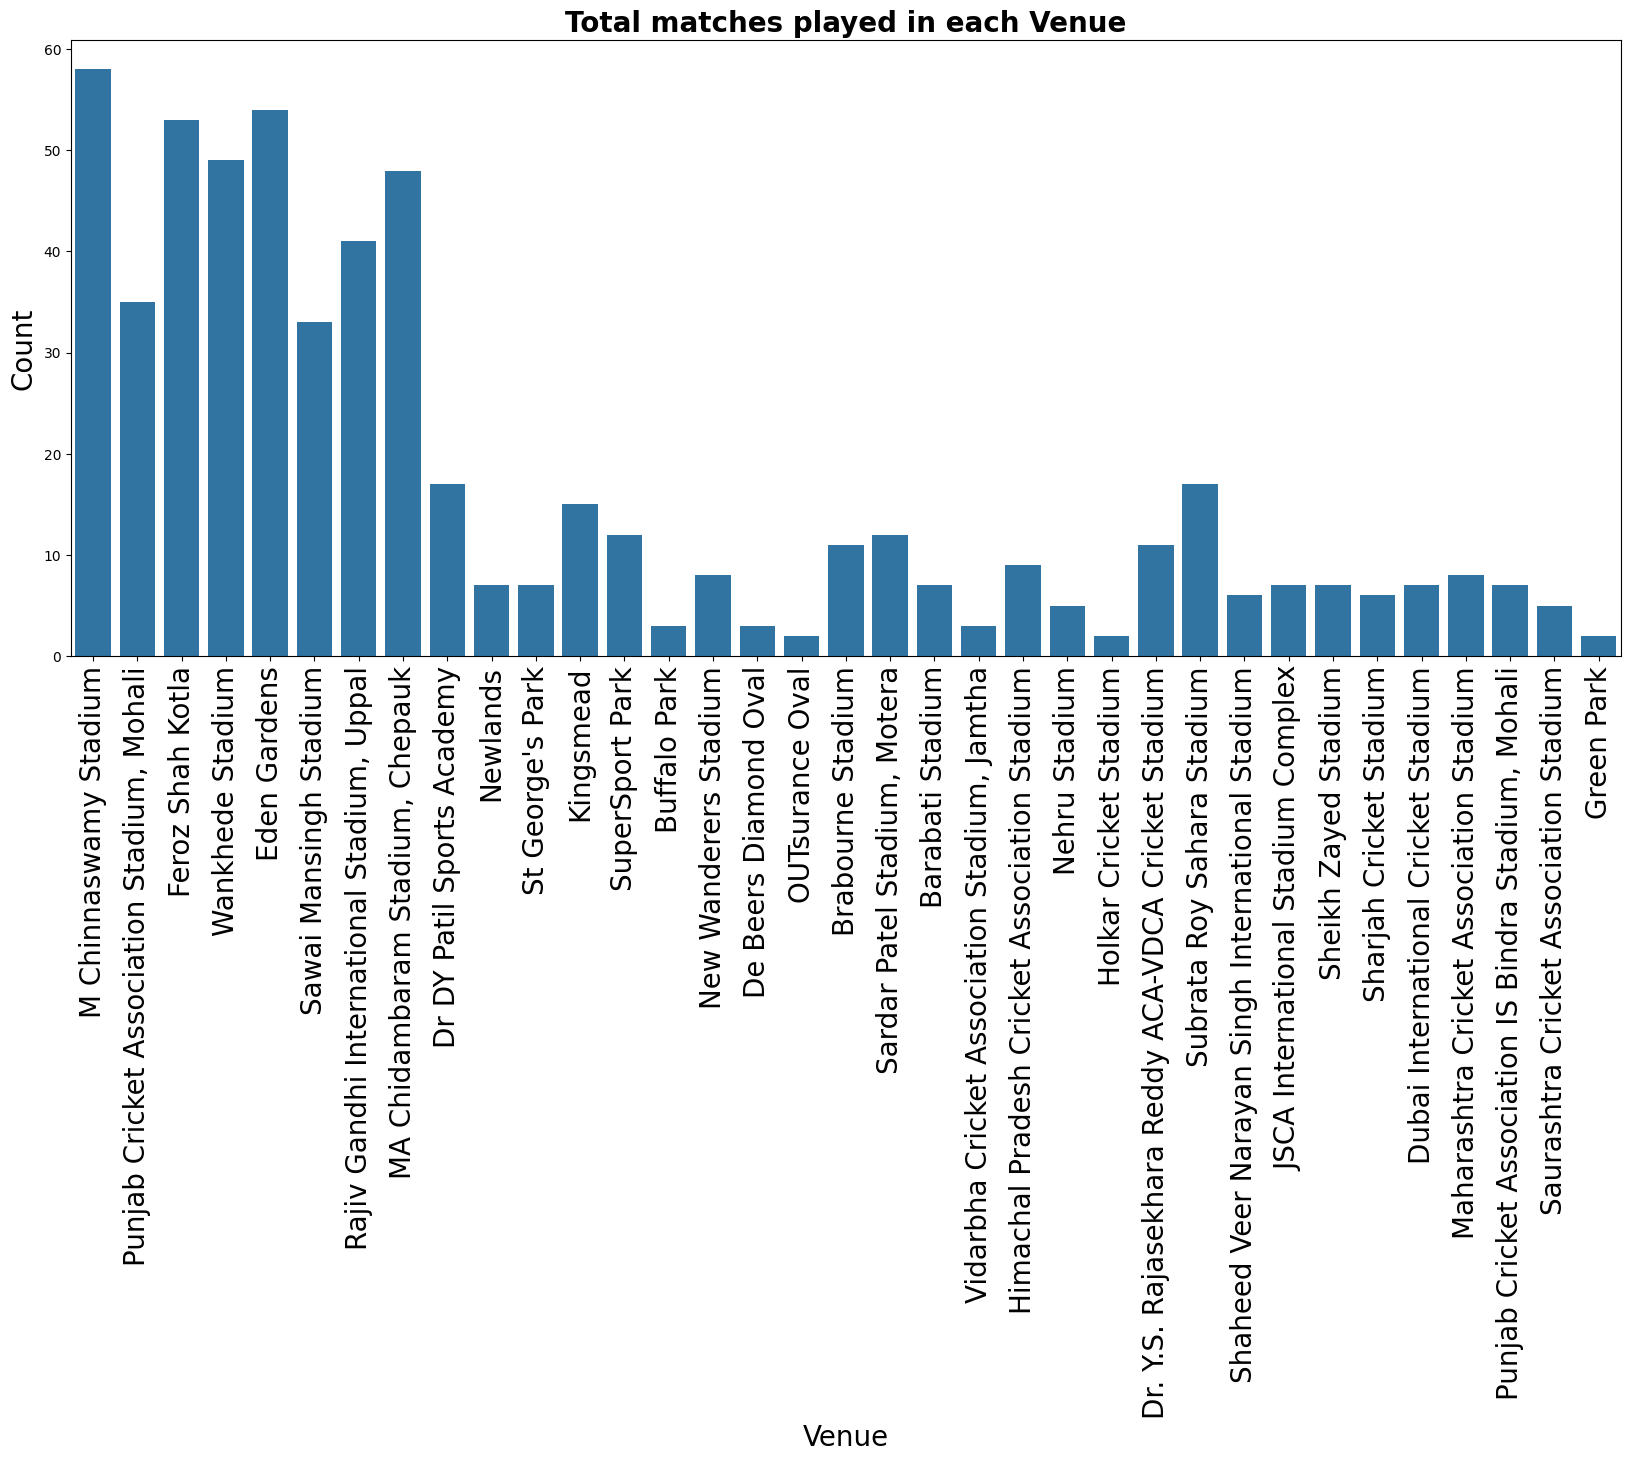

In [88]:
#Number of matches playes in each stadium
# mat.venue.value_counts().head(15).plot(kind="bar",figsize=(16,10))

plt.subplots(figsize=(20, 8))
sns.countplot(x="venue",data=mat)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

In [89]:
def bat_first(x):
    if 'toss_winning_team'=='team1':
        if 'toss_decition'=='bat':
            return 'team1'
        else:
            return 'team2'
    elif 'toss_winning_team'=='team2':
        if 'toss_decition'=='bat':
            return 'team2'
        else:
            return 'team1'

In [90]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [91]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [92]:
filter=["team1","toss_winner"]
tab=df[filter]
tab.groupby(["team1"]).agg("count")

,toss_winner
team1,
Chennai Super Kings,18415
Deccan Chargers,10335
Delhi Daredevils,13092
Gujarat Lions,1412
Kings XI Punjab,16268
Kochi Tuskers Kerala,1650
Kolkata Knight Riders,14461
Mumbai Indians,18367
Pune Warriors,4759


In [93]:
mat.groupby(["team1"]).agg({"match_id":"count"})

,match_id
team1,
Chennai Super Kings,77
Deccan Chargers,43
Delhi Daredevils,57
Gujarat Lions,6
Kings XI Punjab,69
Kochi Tuskers Kerala,7
Kolkata Knight Riders,62
Mumbai Indians,76
Pune Warriors,20


In [94]:
season=df.groupby(['season'])['total_runs'].sum()
season

,total_runs
season,
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862


<ipython-input-95-315f555c2062>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=season,palette="magma")


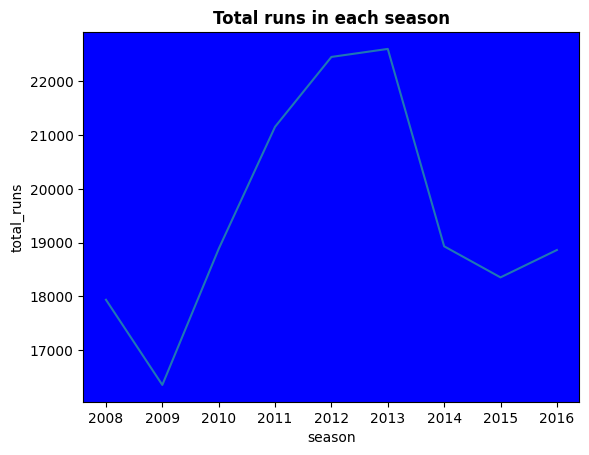

In [95]:
# season=df.groupby(['season'])['total_runs'].sum()
ax = plt.axes()
ax.set(facecolor = "blue")
sns.lineplot(data=season,palette="magma")
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [96]:
x=dev.groupby(['batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
y=x.reset_index(drop=True,inplace=True)
y
x

,batting_team,total_runs
0,Mumbai Indians,21721
1,Royal Challengers Bangalore,21591
2,Chennai Super Kings,20899
3,Kings XI Punjab,20861
4,Delhi Daredevils,19734
5,Kolkata Knight Riders,19481
6,Rajasthan Royals,17703
7,Deccan Chargers,11463
8,Sunrisers Hyderabad,9303
9,Pune Warriors,6358


Maximum Toss Won

In [97]:
mat["toss_winner"].value_counts().head(10)

,count
toss_winner,
Mumbai Indians,74
Kolkata Knight Riders,69
Chennai Super Kings,66
Kings XI Punjab,64
Delhi Daredevils,64
Rajasthan Royals,63
Royal Challengers Bangalore,61
Deccan Chargers,43
Sunrisers Hyderabad,30


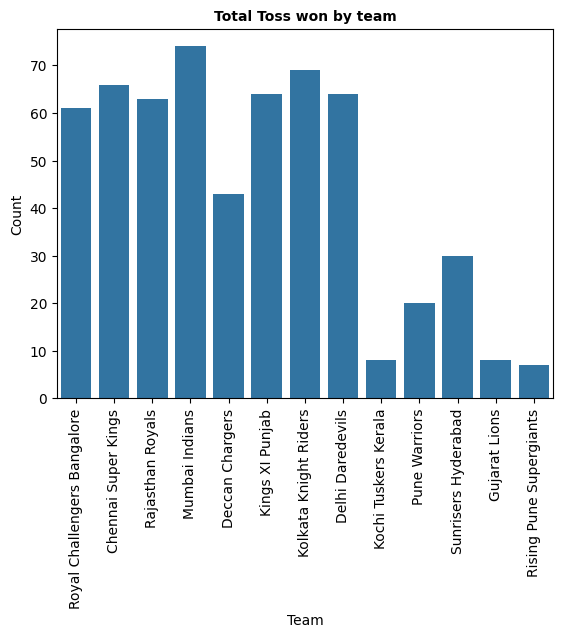

In [98]:
sns.countplot(x="toss_winner",data=mat)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Team', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total Toss won by team', fontsize = 10, fontweight = "bold")
plt.show()

Won the toss and Win the match

In [99]:
k=mat.toss_decision[ mat.toss_winner==mat.winner]
k

,toss_decision
1,bat
8,field
10,field
12,field
14,bat
...,...
570,field
572,field
573,field
575,field


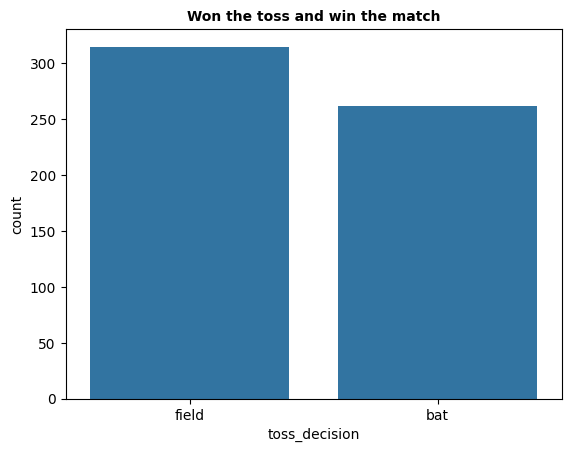

In [100]:
sns.countplot(x="toss_decision",data=mat) # Use the mat DataFrame instead
plt.title("Won the toss and win the match", fontsize = 10, fontweight = "bold")
plt.show()

In [101]:
mat.head(3)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN


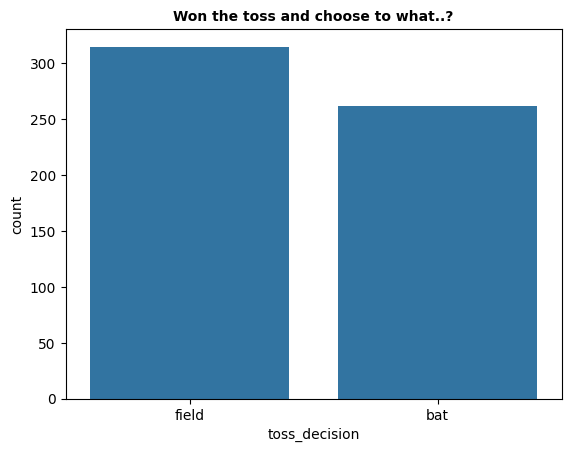

In [102]:
sns.countplot(x="toss_decision",data=mat)
plt.title("Won the toss and choose to what..?", fontsize = 10, fontweight = "bold")
plt.show()

<Axes: ylabel='count'>

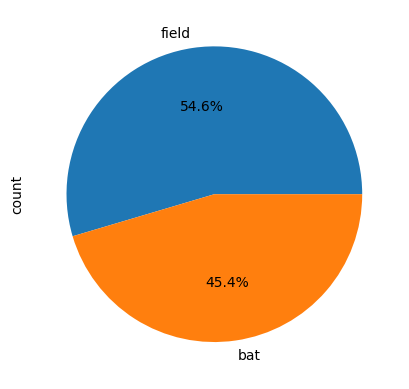

In [103]:
mat.toss_decision.value_counts().plot(kind="pie", autopct='%1.1f%%')

Batsman Overview

In [104]:
dev.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

<Axes: xlabel='batsman'>

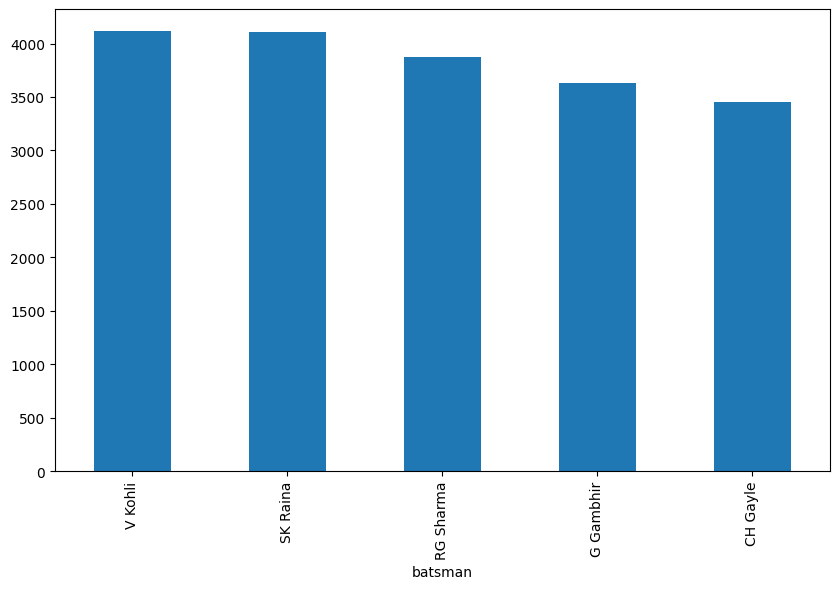

In [105]:
dev.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(10,6))


In [106]:
player = (dev['batsman']=='V Kohli')
kohli =dev[player]

In [107]:
def count(kohli,runs):
    return len(kohli[kohli['batsman_runs']==runs])*runs

In [109]:
print("Runs scored from 1's :",count(kohli,1))
print("Runs scored from 2's :",count(kohli,2))
print("Runs scored from 3's :",count(kohli,3))
print("Runs scored from 4's :",count(kohli,4))
print("Runs scored from 6's :",count(kohli,6))

Runs scored from 1's : 1303
Runs scored from 2's : 444
Runs scored from 3's : 30
Runs scored from 4's : 1444
Runs scored from 6's : 894


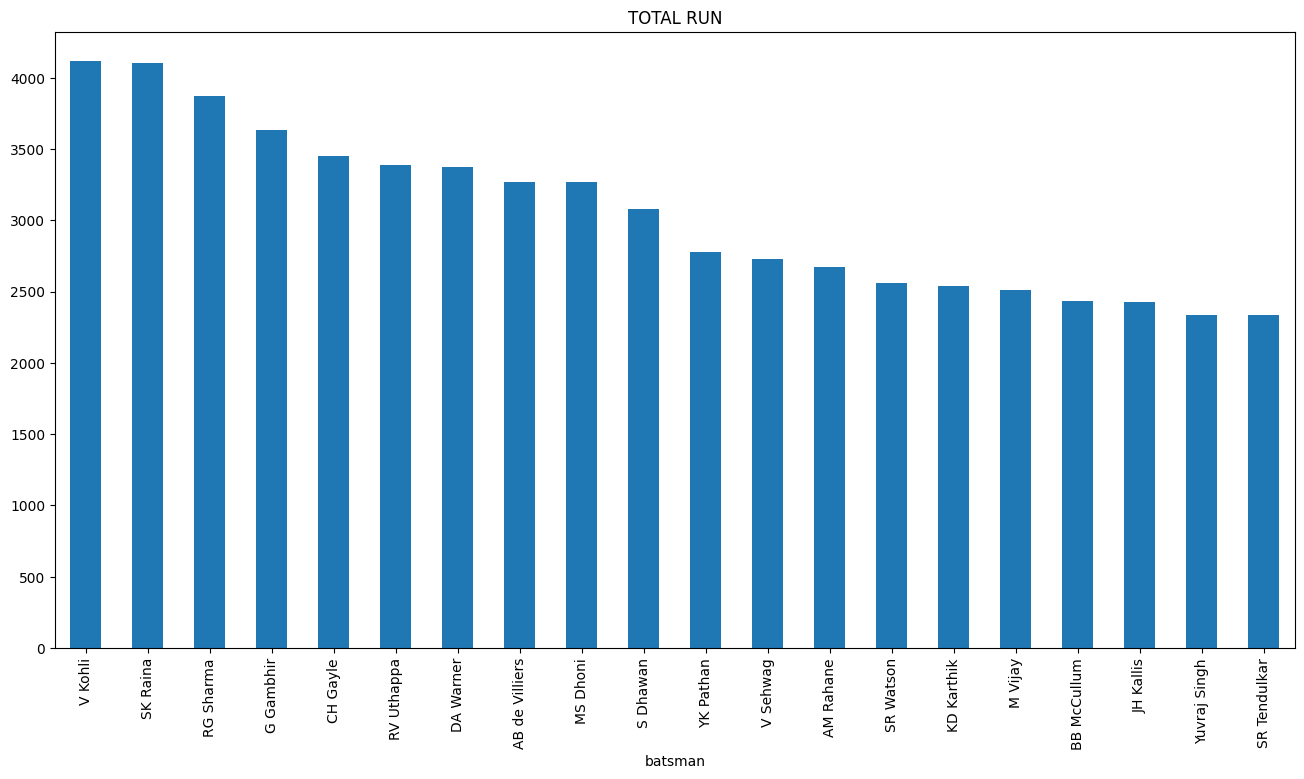

In [110]:
dev.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending=False).head(20).plot(kind="bar",figsize=(16,8))
plt.title("TOTAL RUN")
plt.show()

In [111]:
strike_rate=dev.groupby(["batsman"]).agg({"ball":"count","batsman_runs":"sum"}).sort_values(by="batsman_runs" ,ascending=False)
strike_rate["strike_rate"]=strike_rate.batsman_runs/strike_rate.ball*100
strike_rate.head(10)

,ball,batsman_runs,strike_rate
batsman,,,
V Kohli,3237,4115,127.123880
SK Raina,3059,4106,134.226872
RG Sharma,2996,3874,129.305741
G Gambhir,3028,3634,120.013210
CH Gayle,2360,3451,146.228814
RV Uthappa,2721,3390,124.586549
DA Warner,2440,3373,138.237705
AB de Villiers,2231,3270,146.571044
MS Dhoni,2419,3270,135.179826


In [112]:
df.groupby(["batsman","season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)

,,batsman_runs
batsman,season,
V Kohli,2016,973
DA Warner,2016,848
CH Gayle,2012,733
MEK Hussey,2013,733
CH Gayle,2013,720
AB de Villiers,2016,687
RV Uthappa,2014,660
V Kohli,2013,639
SR Tendulkar,2010,618


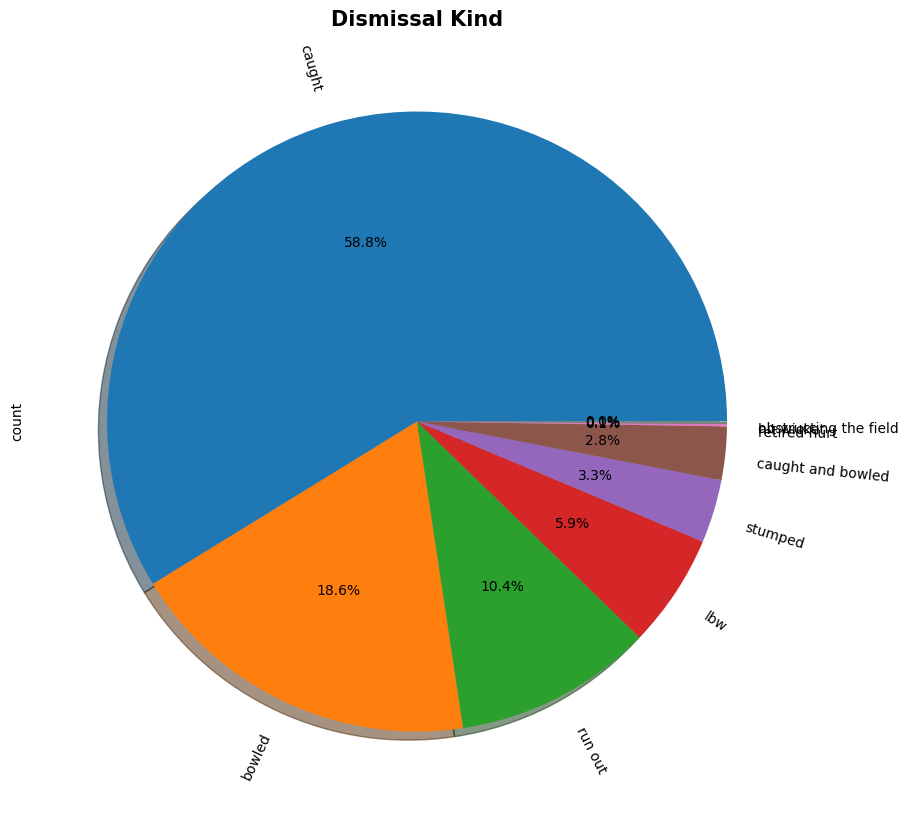

In [113]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

In [114]:
dev.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

Bowling Overview

In [115]:
dev.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [116]:
eco=dev.groupby("bowler").agg({"batsman_runs":"sum","ball":"count"}).sort_values(by="ball",ascending=False)
eco["economy"]=eco["batsman_runs"]/(eco["ball"]/6)
eco.head(10)

,batsman_runs,ball,economy
bowler,,,
Harbhajan Singh,3030,2742,6.630197
P Kumar,2966,2529,7.036773
PP Chawla,3021,2472,7.332524
A Mishra,2852,2466,6.939173
SL Malinga,2407,2407,6.000000
R Ashwin,2409,2359,6.127173
DW Steyn,2209,2159,6.138953
R Vinay Kumar,2834,2141,7.942083
DJ Bravo,2658,2110,7.558294


In [117]:
dev.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [118]:
df.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by=['total_runs'],ascending=False).head(10)


,total_runs,ball,player_dismissed
bowler,,,
P Kumar,3188,2529,96
Harbhajan Singh,3184,2742,128
PP Chawla,3136,2472,127
A Mishra,2960,2466,132
R Vinay Kumar,2945,2141,123
DJ Bravo,2815,2110,137
IK Pathan,2685,2101,97
SL Malinga,2646,2407,159
R Ashwin,2552,2359,110


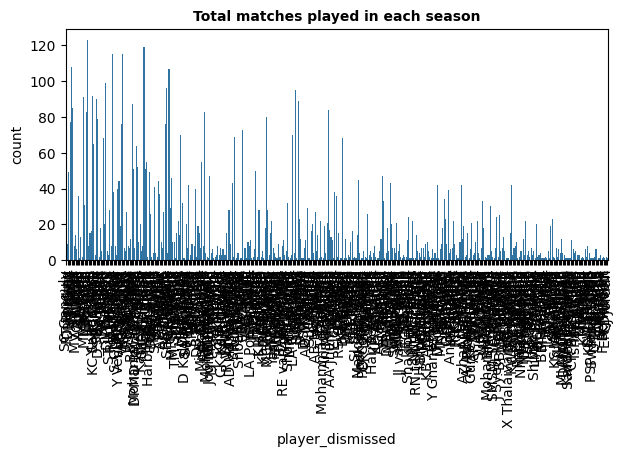

In [119]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="player_dismissed",data=dev)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

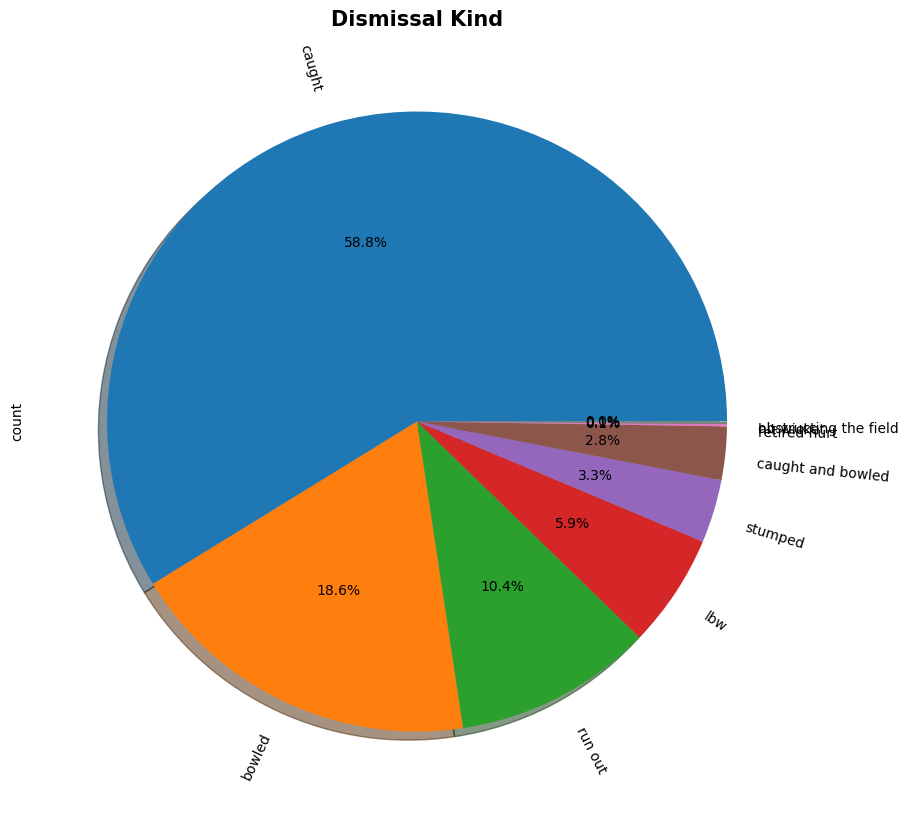

In [120]:
plt.subplots(figsize=(10, 18))
dev['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()